<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week4ml/sol/d6/PCA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

- 178 wine samples
- 13 features about chemical properties
- The first column tell us the type of wines

In [2]:
import pandas as pd

df = pd.read_csv(data_url, header=None)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

In [8]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

## Split the data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                                                   random_state=0)

## Standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
X_test_scaled.shape

(54, 13)

In [16]:
import numpy as np
np.mean(X_train)

1      13.033548
2       2.353790
3       2.384919
4      19.801613
5      99.088710
6       2.324839
7       2.064113
8       0.368065
9       1.640887
10      5.089597
11      0.954194
12      2.619355
13    754.822581
dtype: float64

## Compute the Covariance Matrix

Covariance between feature $j$ and feature $k$:

$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(x_{j}^{(i)}-\mu_{j})(x_{k}^{(i)}-\mu_{k})$$

After using the StandardScaler, that normalize feature $j$ for the sample $i$ by doing:

$$ x_{j_{new}}^{i} = \frac{x_{j_{old}}^{i} - \mu_{j}}{\sigma_{j}}$$ 

(same thing for feature $k$), the mean $\mu_{j}$ (or $\mu_{k}$ for feature $k$) becomes 0 (because standardizing the data shift everything by the mean), so the formula is just:


$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(x_{j}^{(i)})(x_{k}^{(i)})$$



In [18]:
import numpy as np

cov_mat = np.cov(X_train_scaled.T) # <-- Remember to transpose 
# if the columns are the features

In [19]:
cov_mat.shape

(13, 13)

## Computing the Eigenvalues and the Eigenvectors

In [20]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [21]:
eigen_values

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [22]:
eigen_vectors.shape

(13, 13)

In [ ]:
eigen_values[0]*eigen_vectors[:,0]

array([-0.6646289 ,  1.19733616, -0.12325558,  1.00218234, -0.74755436,
       -1.90692551, -2.02112491,  1.48056749, -1.48518993,  0.36582417,
       -1.57937726, -1.78508543, -1.43682565])

In [24]:
np.dot(cov_mat, eigen_vectors[:,0])

array([-0.6646289 ,  1.19733616, -0.12325558,  1.00218234, -0.74755436,
       -1.90692551, -2.02112491,  1.48056749, -1.48518993,  0.36582417,
       -1.57937726, -1.78508543, -1.43682565])

In [25]:
eigen_values.shape

(13,)

## Compute the Explained Variance

In [26]:
import matplotlib.pyplot as plt

$$\frac{\lambda_{i}}{\sum_{i}^{d}\lambda_{i}}$$

In [27]:
tot = sum(eigen_values)

In [28]:
var_explained = [(eig_val/tot) for eig_val in sorted(eigen_values, reverse=True)]

In [29]:
np.array(var_explained)*100

array([36.9514686 , 18.43492706, 11.81515909,  7.33425176,  6.42210782,
        5.05172448,  3.95465389,  2.64391832,  2.38931926,  1.62961377,
        1.38002112,  1.17222624,  0.82060857])

In [30]:
cum_var_exp = np.cumsum(var_explained)

In [31]:
cum_var_exp


array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

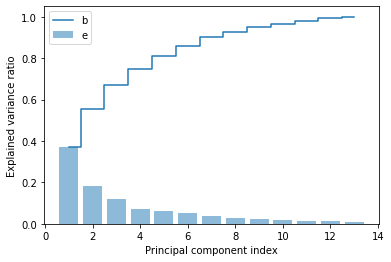

In [32]:
plt.bar(range(1,14), var_explained, alpha=0.5, align="center", label="individual explained variance")
plt.step(range(1,14), cum_var_exp, where="mid", label="cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend("best")

## Transform the Features

First: sort the eigenpairs by decreasing order of the eigenvalues.

In [33]:
sorted_index = pd.Series(eigen_values).sort_values(ascending=False).index

In [34]:
W = eigen_vectors[:, sorted_index[:2]]

In [47]:
X_train_pca = X_train_scaled.dot(W)

In [36]:
X_train_pca.shape


(124, 2)

In [37]:
X_test_pca = X_test_scaled.dot(W)

In [38]:
X_test_pca.shape

(54, 2)

In [39]:
y_train.unique()

array([3, 1, 2])

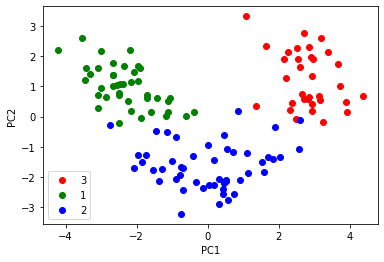

In [49]:
colors = ["r", "g", "b"]

for label, color in zip(y_train.unique(), colors):
    plt.scatter(X_train_pca[y_train==label, 0], 
                X_train_pca[y_train==label, 1], c=color, label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)#test should go with transform and train one is both transform and fit (it look like same as the regression model)

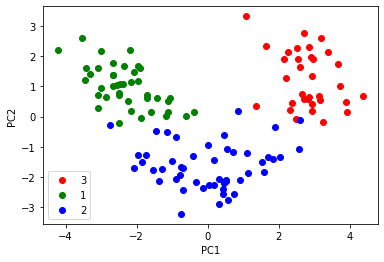

In [46]:
colors = ["r", "g", "b"]

for label, color in zip(y_train.unique(), colors):
    plt.scatter(X_train_PCA[y_train==label, 0], 
                X_train_PCA[y_train==label, 1], c=color, label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()